<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Updated_Binary_classifier(Assignment_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

### Dataset from google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Path

In [8]:
train_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train'
validation_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation'
test_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test'
# train_dir = "./Latest Dataset/train"
# validation_dir = "./Latest Dataset/validation"
# test_dir = "./Latest Dataset/test"

### Dataset create

In [9]:
# Define constants
IMAGE_WIDTH, IMAGE_HEIGHT = 256, 256
NUM_EPOCHS = 20
BATCH_SIZE = 32
# Train the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

Found 1102 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [10]:
print(test_generator.class_indices)
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Badam': 0, 'Chola': 1}
{'Badam': 0, 'Chola': 1}
{'Badam': 0, 'Chola': 1}


### Printing the shape of the train, validation & test data

In [11]:
print("Shape of Train Data:", train_generator[0][0].shape)  # First element contains images
print("Shape of Train Labels:", train_generator[0][1].shape)  # Second element contains labels

print("Shape of Validation Data:", validation_generator[0][0].shape)
print("Shape of Validation Labels:", validation_generator[0][1].shape)

print("Shape of Test Data:", test_generator[0][0].shape)
print("Shape of Test Labels:", test_generator[0][1].shape)

Shape of Train Data: (32, 256, 256, 3)
Shape of Train Labels: (32,)
Shape of Validation Data: (32, 256, 256, 3)
Shape of Validation Labels: (32,)
Shape of Test Data: (32, 256, 256, 3)
Shape of Test Labels: (32,)


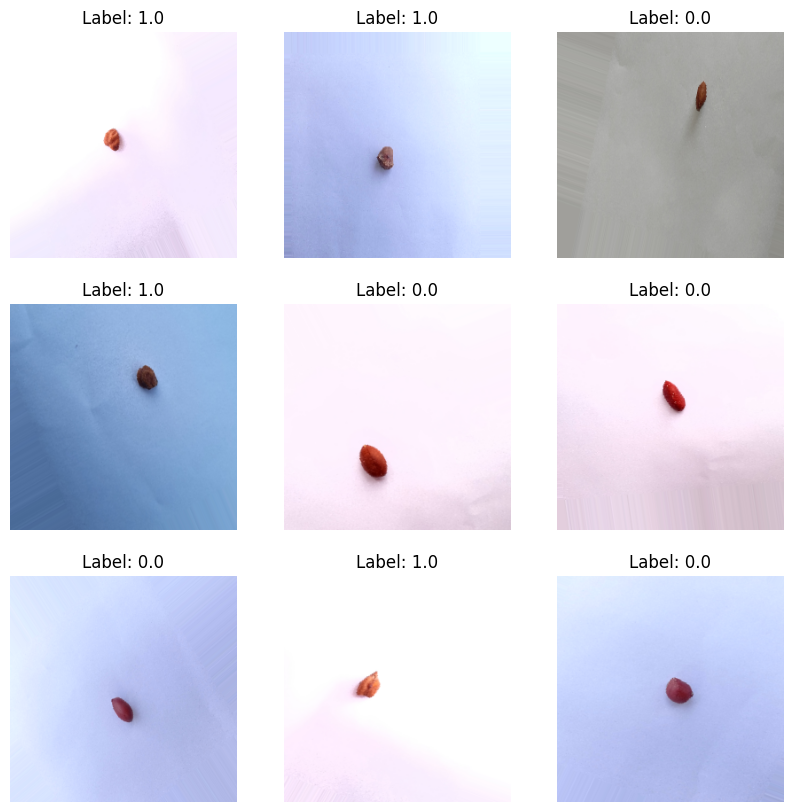

In [12]:
# Display 9 images from the train set
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range to 9
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Label: {sample_labels[i]}')
    plt.axis('off')
plt.show()

### Total Train Test & validation number


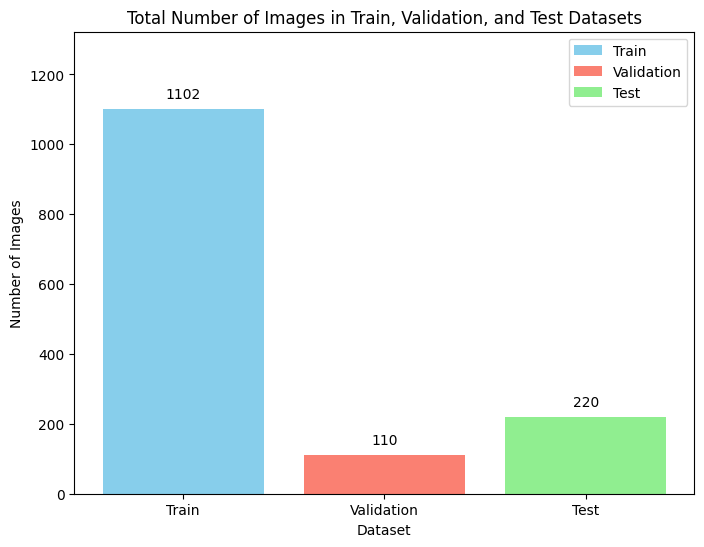

In [13]:

# Get the number of images in each directory
num_train = train_generator.n
num_validation = validation_generator.n
num_test = test_generator.n

# Create labels and values for the bar chart
labels = ["Train", "Validation", "Test"]
values = [num_train, num_validation, num_test]

# Define colors for each dataset
colors = ["skyblue", "salmon", "lightgreen"]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel("Dataset")
plt.ylabel("Number of Images")
plt.title("Total Number of Images in Train, Validation, and Test Datasets")
plt.ylim(0, max(values) * 1.2)  # Adjust the y-axis limits for better visualization
for i, v in enumerate(values):
    plt.text(i, v + max(values) * 0.02, str(v), ha="center", va="bottom")

# Add legend
plt.legend(bars, labels, loc="upper right")

plt.show()

### Number of objects from each set

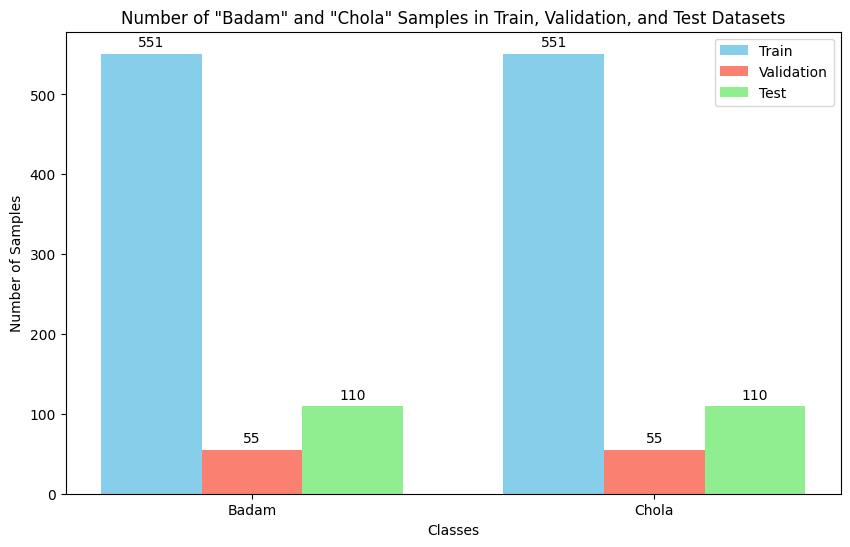

In [14]:
# Define the classes you are interested in
classes_of_interest = ["Badam", "Chola"]


# Function to count images in each class for a given directory
def count_images(directory, classes):
    class_counts = {class_name: 0 for class_name in classes}

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))

    return class_counts


# Count images for the specific classes in train, validation, and test sets
train_class_counts = count_images(train_dir, classes_of_interest)
validation_class_counts = count_images(validation_dir, classes_of_interest)
test_class_counts = count_images(test_dir, classes_of_interest)

# Create labels and values for the bar chart
labels = classes_of_interest
values_train = [train_class_counts[class_name] for class_name in classes_of_interest]
values_validation = [
    validation_class_counts[class_name] for class_name in classes_of_interest
]
values_test = [test_class_counts[class_name] for class_name in classes_of_interest]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, values_train, color="skyblue", width=bar_width, label="Train")
plt.bar(r2, values_validation, color="salmon", width=bar_width, label="Validation")
plt.bar(r3, values_test, color="lightgreen", width=bar_width, label="Test")

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title(
    'Number of "Badam" and "Chola" Samples in Train, Validation, and Test Datasets'
)
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.legend()

# Add labels on the bars
for i, value in enumerate(values_train):
    plt.text(
        i, value + 5, str(value), ha="center", va="bottom", color="black", fontsize=10
    )
for i, value in enumerate(values_validation):
    plt.text(
        i + bar_width,
        value + 5,
        str(value),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )
for i, value in enumerate(values_test):
    plt.text(
        i + 2 * bar_width,
        value + 5,
        str(value),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )

plt.show()

### Build Custom CNN Model Architecture

In [15]:

# Define the input shape of our images
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT,3)  # Assuming images are resized to 150x150 pixels and have 3 color channels (RGB)

# Input layer
inputs = Input(shape=input_shape)

# First convolutional layer
x = Conv2D(32, (3, 3), activation="relu")(inputs)
x = MaxPooling2D((2, 2))(x)

# Second convolutional layer
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Third convolutional layer
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the output
x = Flatten()(x)

# Dropout for regularization
x = Dropout(0.5)(x)

# Dense layer with 512 units
x = Dense(512, activation="relu")(x)

# Output layer with sigmoid activation for binary classification
outputs = Dense(1, activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print the summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856 

In [16]:
learning_rate = 0.0001
early_stop_patience = 20
lr_reduce_patience = 10
lr_reduce_factor = 0.7
callbacks = [
		tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Classifier Dataset/Model Save', monitor = "val_loss", save_best_only = True),
       	tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = early_stop_patience),
       	tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = lr_reduce_factor, patience = lr_reduce_patience)
	]
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



### Train the model

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks = callbacks
)

# Save the model
#model.save('/content/drive/MyDrive/leaf_classifier_model.h5')
# Loads the weights
#model.load_weights('/content/drive/MyDrive/leaf_classifier_model.h5')

Epoch 1/20
34/34 [==============================] - 319s 9s/step - loss: 0.7218 - accuracy: 0.5028 - val_loss: 0.6961 - val_accuracy: 0.5104 - lr: 1.0000e-04
Epoch 2/20
34/34 [==============================] - 290s 8s/step - loss: 0.6865 - accuracy: 0.5533 - val_loss: 0.6740 - val_accuracy: 0.4896 - lr: 1.0000e-04
Epoch 3/20
34/34 [==============================] - 285s 8s/step - loss: 0.6617 - accuracy: 0.6206 - val_loss: 0.6812 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 4/20
34/34 [==============================] - 277s 8s/step - loss: 0.5758 - accuracy: 0.7701 - val_loss: 0.7148 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 5/20
34/34 [==============================] - 262s 8s/step - loss: 0.4622 - accuracy: 0.7991 - val_loss: 0.7976 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 6/20
34/34 [==============================] - 279s 8s/step - loss: 0.3596 - accuracy: 0.8542 - val_loss: 0.8706 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 7/20
34/34 [==============================] - 

In [18]:
# input_shape = (150, 150, 3)
# inputs = Input(shape=input_shape)
# x = Conv2D(32, (3, 3), activation="relu")(inputs)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(64, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Flatten()(x)
# x = Dense(512, activation="relu")(x)
# outputs = Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()

# input_shape = (32, 32, 1)
# inputs = Input(shape=input_shape)

# # Convolutional layers
# x = Conv2D(32, (3, 3), activation="relu")(inputs)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(64, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)

# # Flatten and dense layers
# x = Flatten()(x)
# x = Dense(128, activation="relu")(x)

# # Output layer for binary classification (1 neuron with sigmoid activation)
# outputs = Dense(1, activation="sigmoid")(x)

# # Create the model
# model = keras.Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# # Display model summary
# model.summary()

In [19]:
# history = model.fit(
#     train_generator,
#     epochs=NUM_EPOCHS,
#     validation_data=validation_generator
# )

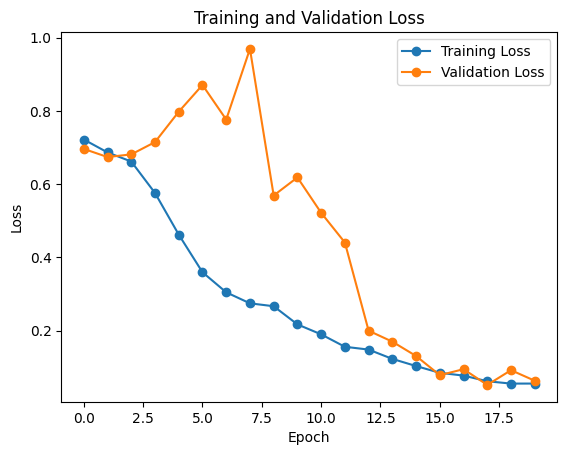

In [20]:
plt.plot(history.history['loss'],  '-o',  label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('CNN_Training_and_Validation_Loss.png')
plt.show()

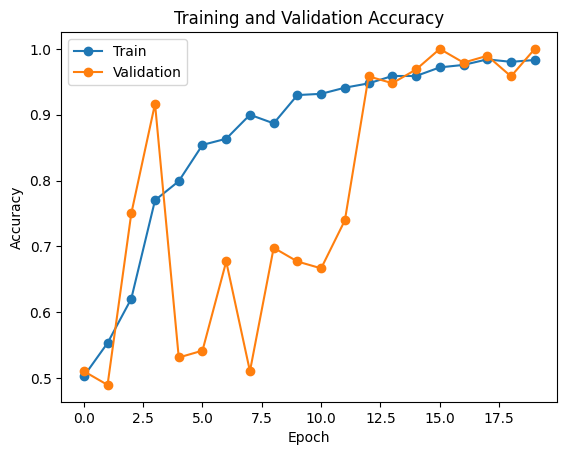

In [21]:
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('CNN_Training_and_Validation_Accuracy.png')
plt.show()

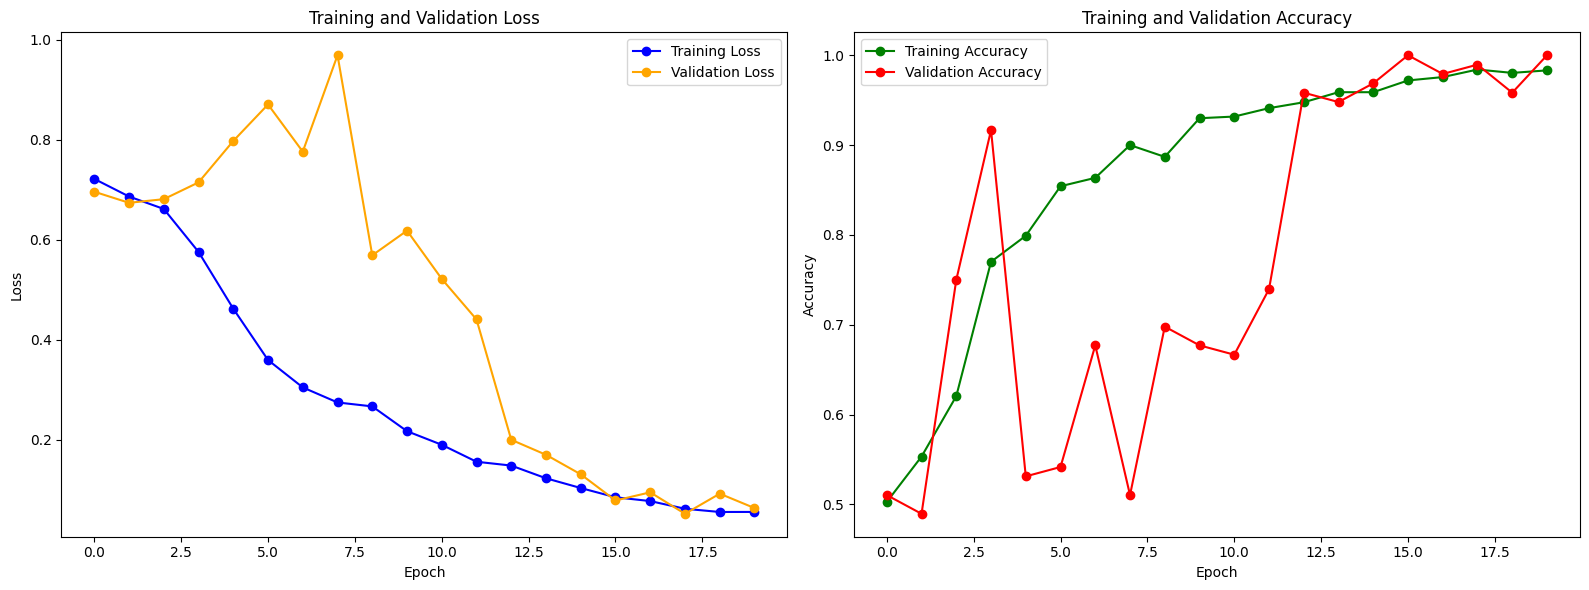

In [22]:
plt.figure(figsize=(16, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### Evaluate the model on test data

In [23]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc*100)

7/7 [==============================] - 101s 16s/step - loss: 0.1145 - accuracy: 0.9955
Test accuracy: 99.54545497894287


### Confussion Matrix Of CNN Based Classifier

7/7 [==============================] - 19s 3s/step


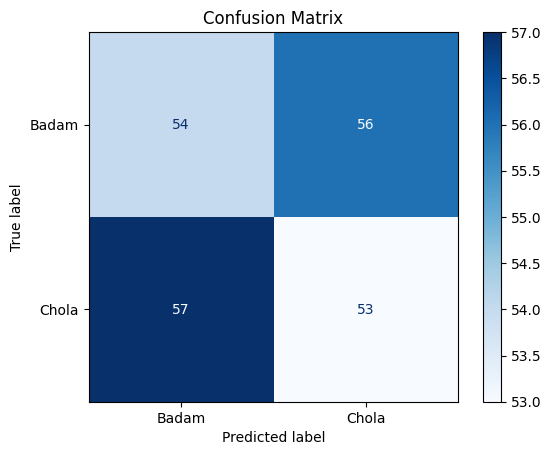

Accuracy: 0.4863636363636364
Precision: 0.48623853211009177
Recall: 0.4818181818181818
F1 Score: 0.4840182648401826


In [24]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true labels from the test data generator
true_classes = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Badam', 'Chola'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Display a particular Image

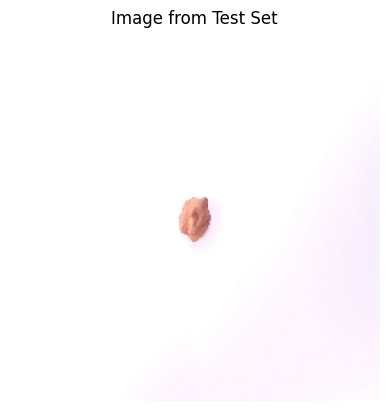

Label: Chola


In [25]:
# Get a batch of images and labels from the test generator
images, labels = next(test_generator)

# Choose a specific index to display (e.g., 0 for the first image)
index = 0

# Display the image
plt.imshow(images[index])
plt.title('Image from Test Set')
plt.axis('off')
plt.show()

# Print the corresponding label (assuming binary classification)
if labels[index] == 0:
    print("Label: Badam")
else:
    print("Label: Chola")

### Fully connected neural network-based binary classifier

In [26]:

# Define the input layer
inputs = Input((IMAGE_WIDTH, IMAGE_HEIGHT,3), name='input')

x = Flatten()(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
fcnn_model = Model(inputs, outputs, name='FCNN')
fcnn_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
fcnn_model.summary()

Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                6291488   
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6295713 (24.02 MB)
Trainable params: 6295713 (24

In [27]:
learning_rate = 0.0001
early_stop_patience = 20
lr_reduce_patience = 10
lr_reduce_factor = 0.7
callbacks = [
		tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Classifier Dataset/Ann_Model', monitor = "val_loss", save_best_only = True),
       	tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = early_stop_patience),
       	tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = lr_reduce_factor, patience = lr_reduce_patience)
	]
# Compile the model
fcnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = fcnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks = callbacks
)
# Save the fcnn_model
#fcnn_model.save('/content/drive/MyDrive/leaf_classifier_model.h5')
# Loads the weights
#fcnn_model.load_weights('/content/drive/MyDrive/leaf_classifier_model.h5')


Epoch 1/20
34/34 [==============================] - 122s 4s/step - loss: 0.8476 - accuracy: 0.5112 - val_loss: 0.9973 - val_accuracy: 0.4792 - lr: 1.0000e-04
Epoch 2/20
34/34 [==============================] - 119s 4s/step - loss: 0.8798 - accuracy: 0.4850 - val_loss: 0.6917 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/20
34/34 [==============================] - 116s 3s/step - loss: 0.6882 - accuracy: 0.5449 - val_loss: 0.6877 - val_accuracy: 0.5104 - lr: 1.0000e-04
Epoch 4/20
34/34 [==============================] - 123s 4s/step - loss: 0.7184 - accuracy: 0.4953 - val_loss: 0.6826 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 5/20
34/34 [==============================] - 120s 4s/step - loss: 0.6976 - accuracy: 0.5477 - val_loss: 0.6887 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 6/20
34/34 [==============================] - 117s 3s/step - loss: 0.6894 - accuracy: 0.5421 - val_loss: 0.7163 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/20
34/34 [==============================] - 

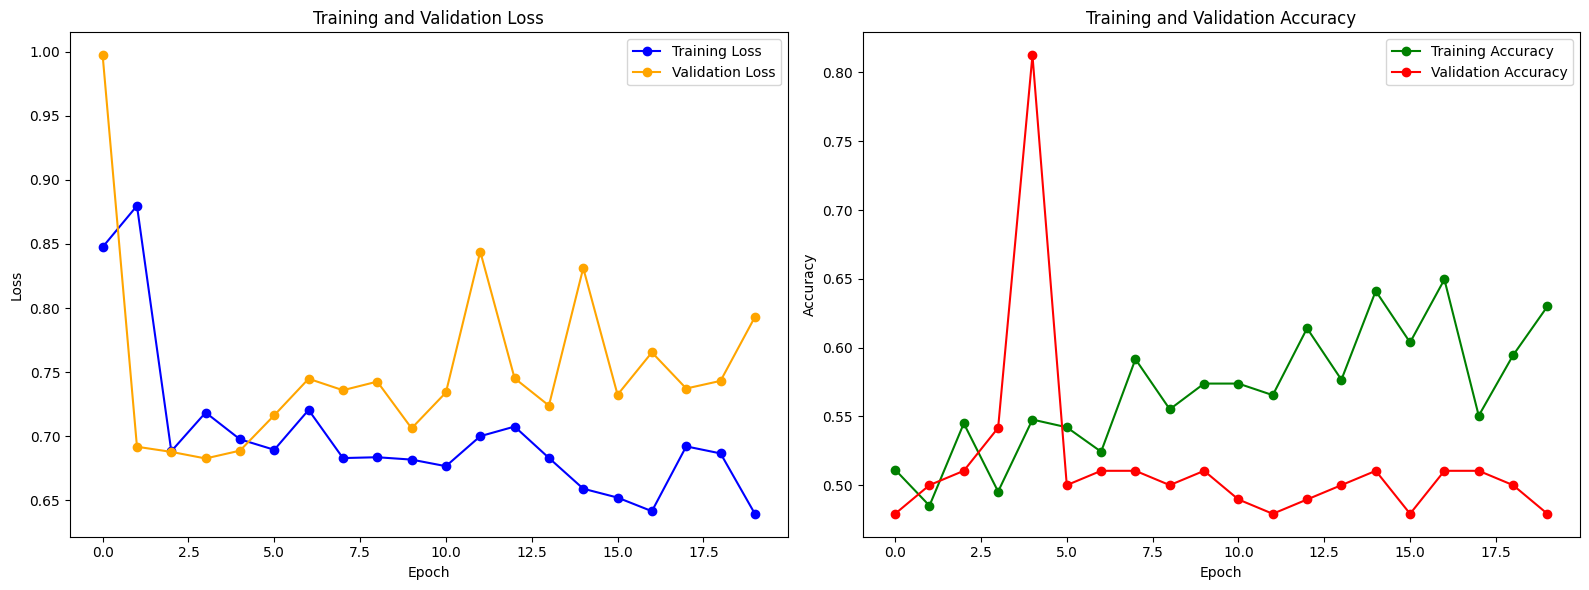

In [28]:
plt.figure(figsize=(16, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### Evaluate the model on test data

In [29]:
# Evaluate the model on test data
test_loss, test_acc = fcnn_model.evaluate(test_generator)
print("Test accuracy:", test_acc*100)

7/7 [==============================] - 12s 2s/step - loss: 0.7367 - accuracy: 0.5000
Test accuracy: 50.0


### Confussion Matrix Of FCNN Based Classifier

7/7 [==============================] - 14s 2s/step


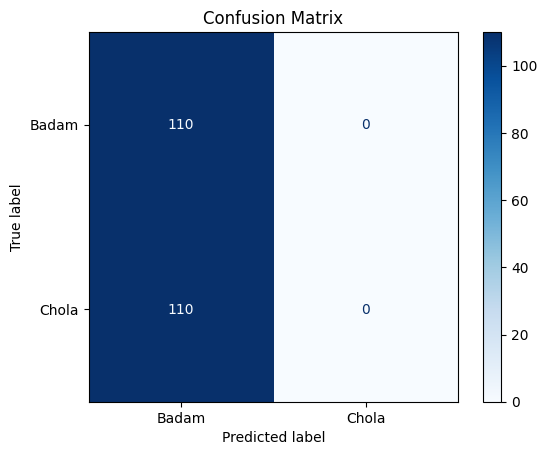

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Make predictions on the test data
predictions = fcnn_model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true labels from the test data generator
true_classes = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Badam', 'Chola'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Calculate precision
precision = precision_score(true_classes, predicted_classes)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)